# Weather Prediction using ML Algorithms

In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
Load the weather data

In [25]:
weather_data=pd.read_csv("weather_predictions.csv")
weather_data

,Temperature (C),Humidity (%),Wind Speed (km/h),Chance of Rain (%)
0,20.3,45,10,20
1,18.7,52,12,30
2,22.1,38,8,10
3,19.5,55,14,40
4,17.8,60,16,50
...,...,...,...,...
58,17.1,72,16,60
59,19.9,49,11,25
60,22.6,35,7,5
61,18.4,56,14,50


In [26]:
weather_data.head()

,Temperature (C),Humidity (%),Wind Speed (km/h),Chance of Rain (%)
0,20.3,45,10,20
1,18.7,52,12,30
2,22.1,38,8,10
3,19.5,55,14,40
4,17.8,60,16,50


In [27]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature (C)     63 non-null     float64
 1   Humidity (%)        63 non-null     int64  
 2   Wind Speed (km/h)   63 non-null     int64  
 3   Chance of Rain (%)  63 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 2.1 KB


# Correlation

In [32]:
corr=weather_data.corr()
corr

,Temperature (C),Humidity (%),Wind Speed (km/h),Chance of Rain (%)
Temperature (C),1.000000,-0.974184,-0.959937,-0.967224
Humidity (%),-0.974184,1.000000,0.926918,0.959539
Wind Speed (km/h),-0.959937,0.926918,1.000000,0.975658
Chance of Rain (%),-0.967224,0.959539,0.975658,1.000000


<Axes: >

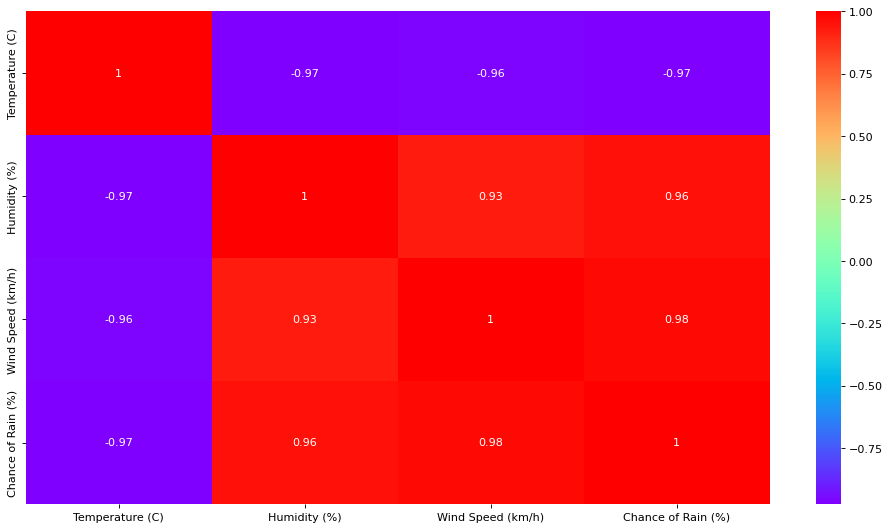

In [34]:
plt.figure(figsize=(15,8),dpi=80)
sns.heatmap(data=corr,annot=True,cmap='rainbow')

# Target Variable Separation
Separate the target variable from the predictor variable

In [13]:
X = weather_data.drop(["Chance of Rain (%)"], axis=1)
y = weather_data["Chance of Rain (%)"]

Split the data into training and testing sets

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling
## Naive Bayes Classifier
Train and test the Naive Bayes Classifier

In [19]:
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
nb_train_acc = nb_clf.score(X_train, y_train)

In [20]:
nb_test_acc = nb_clf.score(X_test, y_test)
print("Naive Bayes training accuracy:", nb_train_acc)
print("Naive Bayes testing accuracy:", nb_test_acc)

Naive Bayes training accuracy: 0.92
Naive Bayes testing accuracy: 0.6923076923076923


## XGBoost Algorithm
Train and test the XGBoost algorithm

In [21]:
xgb_reg = XGBRegressor()
xgb_reg.fit(X_train, y_train)
xgb_train_acc = xgb_reg.score(X_train, y_train)
xgb_test_acc = xgb_reg.score(X_test, y_test)
print("XGBoost training accuracy:", xgb_train_acc)
print("XGBoost testing accuracy:", xgb_test_acc)

XGBoost training accuracy: 0.9999999987042446
XGBoost testing accuracy: 0.9912007721447029


# Plotting
Plot the predicted vs actual values for Naive Bayes

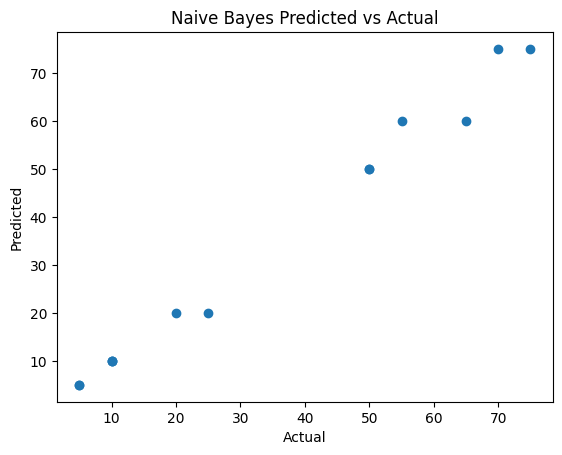

In [22]:
nb_pred = nb_clf.predict(X_test)
plt.scatter(y_test, nb_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Naive Bayes Predicted vs Actual")
plt.show()

Plot the predicted vs actual values for XGBoost

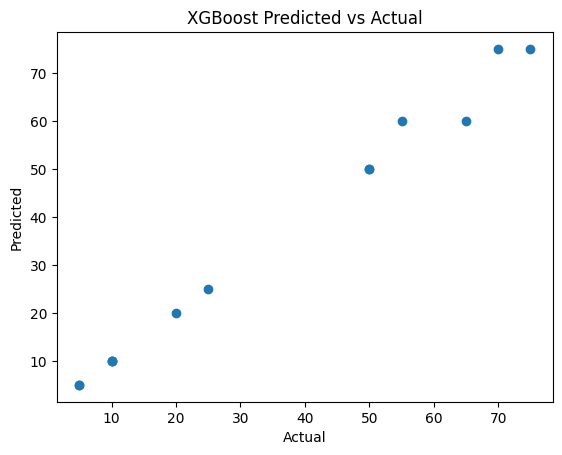

In [24]:
xgb_pred = xgb_reg.predict(X_test)
plt.scatter(y_test, xgb_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost Predicted vs Actual")
plt.show()